# Using groupby in Pandas
Use this method when you want to collapse a dataframe by a categorical column and run an aggregation. For example, if you had a list of alcohol consumption by country, and you wanted to know the average consumed **for each** continent. Let's look at that example.

#### Load python tools

In [1]:
import pandas as pd

#### Read sample dataset

In [2]:
df = pd.read_csv('https://bit.ly/drinksbycountry')

#### What's that dataframe look like? 

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


#### How many records, or countries? 

In [4]:
len(df)

193

#### How many countries in each continent? 

In [5]:
df['continent'].value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

---

#### What's the average beer servings in all countries? 

In [6]:
df['beer_servings'].mean()

106.16062176165804

#### But what about **for each** continent? 

In [7]:
df.groupby(['continent'])['beer_servings'].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

#### You're basically doing this, but **for each** continent

In [8]:
df[df['continent'] == 'Africa']['beer_servings'].mean()

61.471698113207545

#### Or ... 

In [9]:
df[df['continent'] == 'Asia']['beer_servings'].mean()

37.04545454545455

#### Remember, you can subset a dataframe — in this case to see each country in North America:

In [10]:
north_america = df[df['continent'] == 'North America']

#### Which countries consume the most beer? 

In [11]:
north_america.sort_values('beer_servings', ascending=False).head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
130,Panama,285,104,18,7.2,North America
17,Belize,263,114,8,6.8,North America
184,USA,249,158,84,8.7,North America
32,Canada,240,122,100,8.2,North America
109,Mexico,238,68,5,5.5,North America


#### Or total litres of alcohol

In [12]:
north_america.sort_values('total_litres_of_pure_alcohol', ascending=False).head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
68,Grenada,199,438,28,11.9,North America
144,St. Lucia,171,315,71,10.1,North America
184,USA,249,158,84,8.7,North America
32,Canada,240,122,100,8.2,North America
143,St. Kitts & Nevis,194,205,32,7.7,North America


#### Back to groupby: You can use other aggregation methods, too

In [13]:
df.groupby(['continent'])['beer_servings'].max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [14]:
df.groupby(['continent'])['beer_servings'].min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

#### There's another method allowing more agg types

In [15]:
df.groupby(['continent'])['beer_servings'].agg(['min', 'max', 'count', 'mean']).reset_index()

,continent,min,max,count,mean
0,Africa,0,376,53,61.471698
1,Asia,0,247,44,37.045455
2,Europe,0,361,45,193.777778
3,North America,1,285,23,145.434783
4,Oceania,0,306,16,89.687500
5,South America,93,333,12,175.083333


#### You can define a groupby as a variable, if you want

In [16]:
continents = df.groupby(['continent'])['beer_servings'].agg(['min', 'max', 'count', 'mean']).reset_index()

#### You can also stick to one aggregation method but use if for all your numerical columns

In [17]:
all_drinks = df.groupby(['continent']).mean()

#### And even plot it if you want

<AxesSubplot:xlabel='continent'>

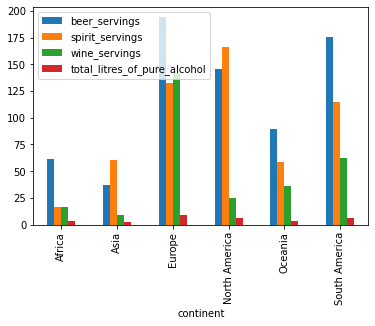

In [18]:
all_drinks.plot(kind='bar')